In [1]:
import torch
import pandas as pd
import random
import seaborn as sns
from compare import getExampleSentencesBySense
import matplotlib.pyplot as plt
import json
from experiment import train_lemma_classifiers_with_vec
from bert import generate_vectorization
from vectrain import *
from lemmas import *

using gpu


In [2]:
%matplotlib inline
sns.set(rc={'figure.figsize':(16,10)})

In [3]:
#Prepare Data for Bert Graphs
data_file = "data/bert_all_lemmas_data.csv"
df = pd.read_csv(data_file)
freq_dict = create_sense_freq_dict()
def get_freq(sense):
    return freq_dict[sense]
df = pd.concat([df, df["sense1"].apply(get_freq).rename("sense1_freq")], axis=1)
df = pd.concat([df, df["sense2"].apply(get_freq).rename("sense2_freq")], axis=1)
df = df.sort_values(by="best_avg_acc")

In [4]:
df

,spec,lemma,best_avg_acc,sense1,sense2,pos1,pos2,max_samp,sense1_freq,sense2_freq
146,[0],have,0.5164,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,VERB,VERB,1000,2516,1792
52,[0],take,0.5166,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,VERB,VERB,1000,215,210
40,[0],how,0.5176,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,ADV,ADV,1000,258,160
260,[0],be,0.5187,/dictionary/sense/en_us_NOAD3e_2012/m_en_us122...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us122...,VERB,VERB,1000,19555,1180
307,[0],make,0.5189,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,VERB,VERB,1000,1646,226
291,[0],feel,0.5195,/dictionary/sense/en_us_NOAD3e_2012/m_en_us124...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us124...,VERB,VERB,1000,283,163
133,[0],last,0.5213,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,ADJ,ADJ,1000,261,105
245,[0],too,0.5213,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,ADV,ADV,1000,297,205
222,[0],way,0.5215,/dictionary/sense/en_us_NOAD3e_2012/m_en_us130...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us130...,NOUN,NOUN,1000,491,154
253,[0],more,0.5216,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,ADV,ADV,1000,389,111


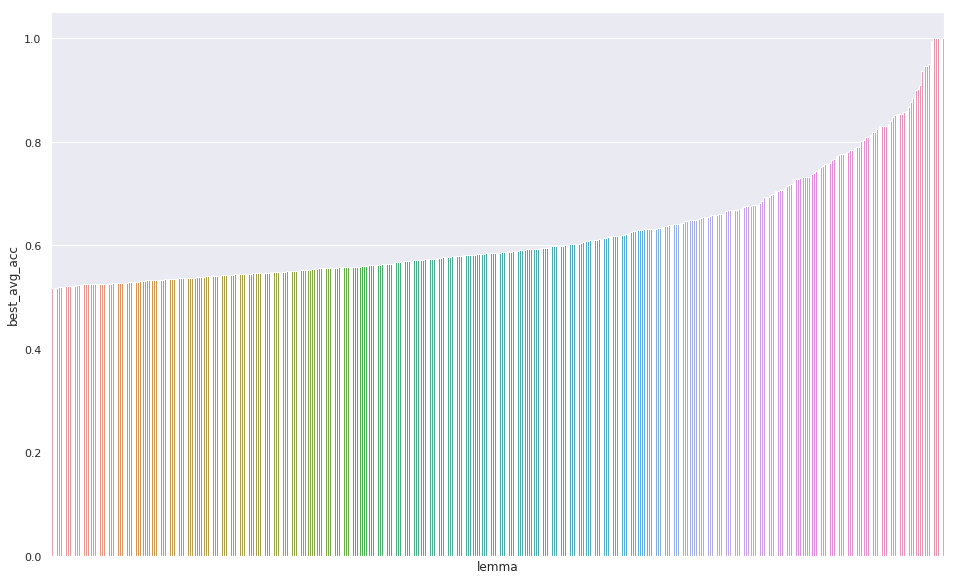

In [5]:
all_lemmas = df
plt.xticks(rotation=45)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
all_lemmas_graph = sns.barplot(x="lemma", y="best_avg_acc", data=all_lemmas)

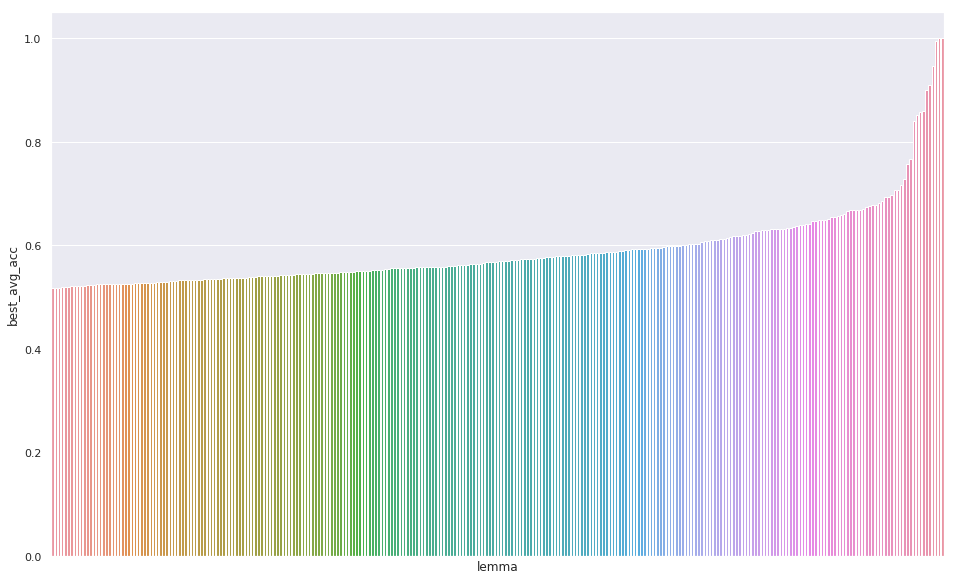

In [6]:
same_pos = df[df["pos1"] == df["pos2"]]
plt.xticks(rotation=45)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
same_pos_graph = sns.barplot(x="lemma", y="best_avg_acc", data=same_pos)

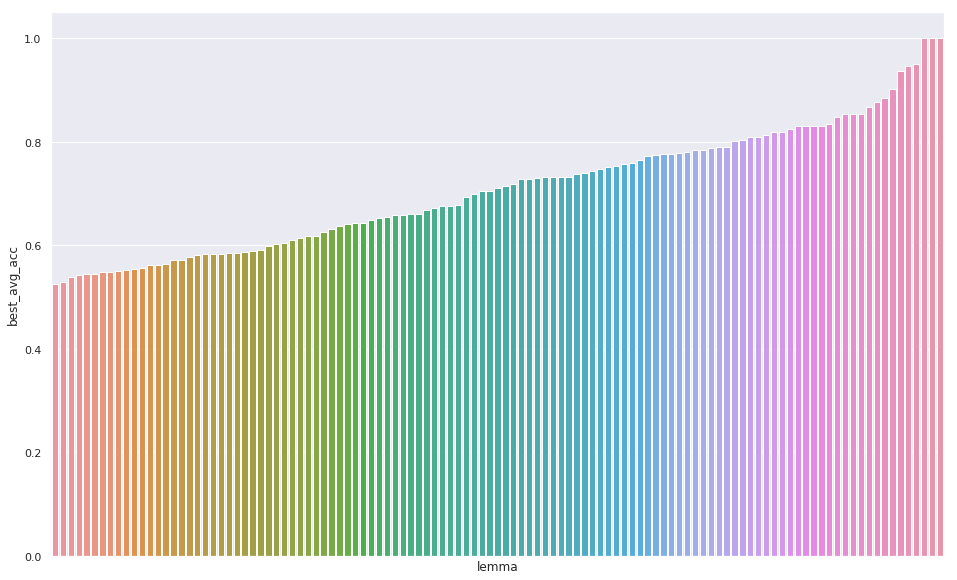

In [7]:
diff_pos = df[df["pos1"] != df["pos2"]]
plt.xticks(rotation=45)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
diff_pos_graph = specs = sns.barplot(x="lemma", y="best_avg_acc", data=diff_pos)

In [8]:


with open("data/sense_to_pofs_dict.json") as f:
    sense_pos_dict = json.load(f)
        
def get_pair_type(row):
    sense1_pos = sense_pos_dict[row[3]]
    sense2_pos = sense_pos_dict[row[4]]
    if sense1_pos > sense2_pos:
        sense1_pos, sense2_pos = sense2_pos, sense1_pos
    return sense1_pos+", "+sense2_pos

In [9]:
tmp = df.apply(get_pair_type, axis=1).rename("pos_combo")

df_with_pos_combo = pd.concat([df, tmp], axis=1)
df_with_pos_combo

,spec,lemma,best_avg_acc,sense1,sense2,pos1,pos2,max_samp,sense1_freq,sense2_freq,pos_combo
146,[0],have,0.5164,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,VERB,VERB,1000,2516,1792,"VERB, VERB"
52,[0],take,0.5166,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,VERB,VERB,1000,215,210,"VERB, VERB"
40,[0],how,0.5176,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,ADV,ADV,1000,258,160,"ADV, ADV"
260,[0],be,0.5187,/dictionary/sense/en_us_NOAD3e_2012/m_en_us122...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us122...,VERB,VERB,1000,19555,1180,"VERB, VERB"
307,[0],make,0.5189,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,VERB,VERB,1000,1646,226,"VERB, VERB"
291,[0],feel,0.5195,/dictionary/sense/en_us_NOAD3e_2012/m_en_us124...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us124...,VERB,VERB,1000,283,163,"VERB, VERB"
133,[0],last,0.5213,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,ADJ,ADJ,1000,261,105,"ADJ, ADJ"
245,[0],too,0.5213,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,ADV,ADV,1000,297,205,"ADV, ADV"
222,[0],way,0.5215,/dictionary/sense/en_us_NOAD3e_2012/m_en_us130...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us130...,NOUN,NOUN,1000,491,154,"NOUN, NOUN"
253,[0],more,0.5216,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,ADV,ADV,1000,389,111,"ADV, ADV"


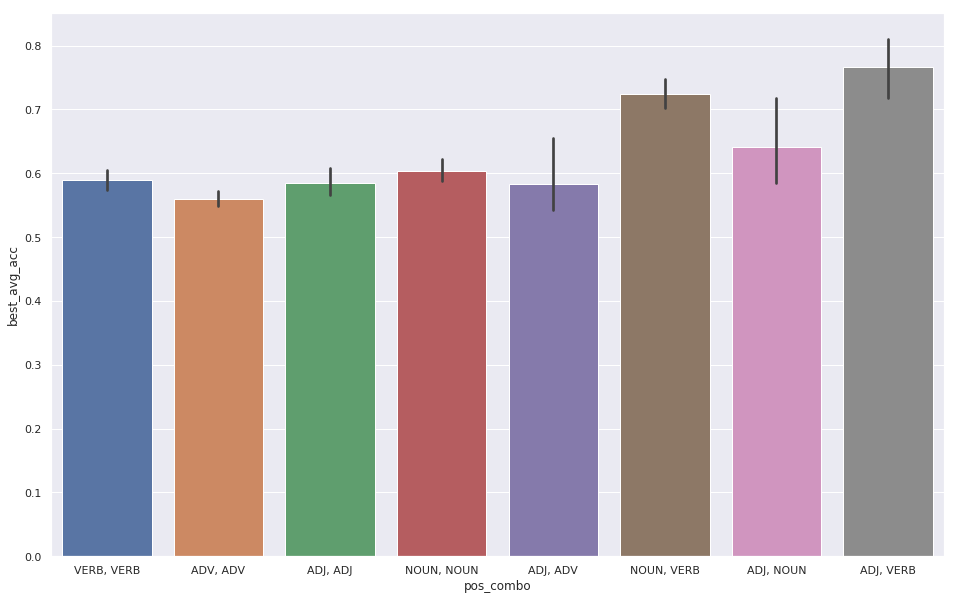

In [10]:
#Remove columns with only one occurance
#include all with bars
df_with_pos_combo = df_with_pos_combo[df_with_pos_combo["pos_combo"].isin(["VERB, VERB",
"ADV, ADV","ADJ, ADJ","NOUN, NOUN", "ADJ, ADV", "NOUN, VERB", "ADJ, NOUN", "ADJ, VERB"])] 
df_with_pos_combo
diff_pos_graph = sns.barplot(x="pos_combo", y="best_avg_acc", data=df_with_pos_combo)

[None]

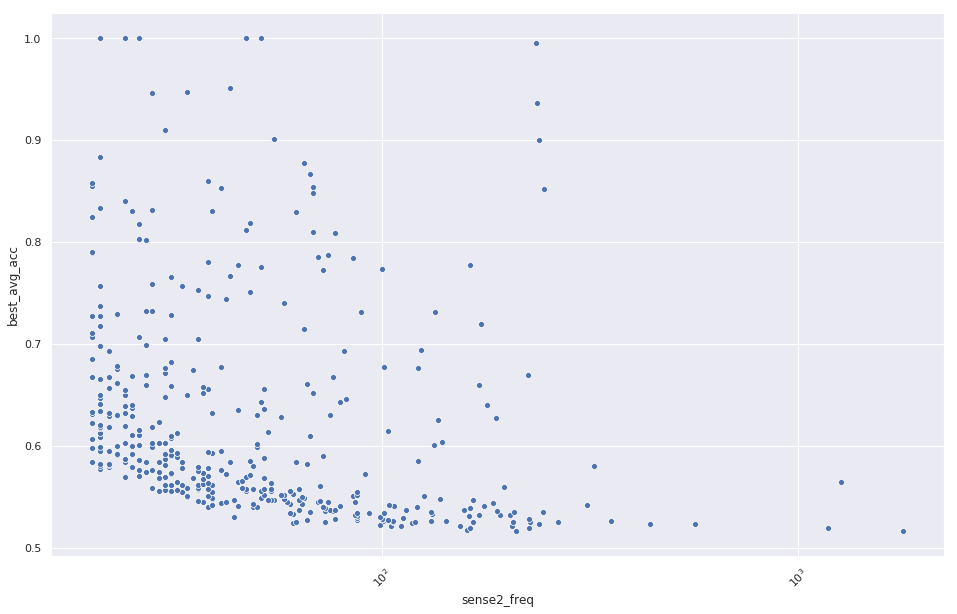

In [41]:
max_samp_data = df
plt.xticks(rotation=45)
#add a log scale on the x axis

max_samp_graph = sns.scatterplot(x="sense2_freq", y="best_avg_acc", data=max_samp_data)
max_samp_graph.set(xscale="log")

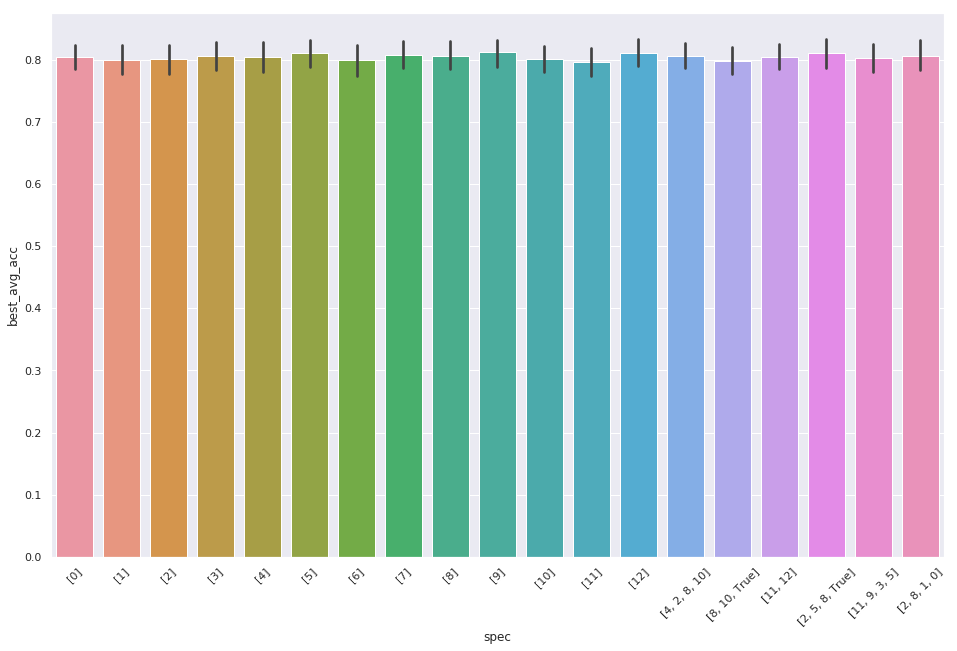

In [12]:
spec_data = pd.read_csv("classifier_data_spec8.csv")

#Note: this is based off of a subset of the words
specs = sns.barplot(x="spec", y="best_avg_acc", data=spec_data)
plt.xticks(rotation=45)
plt.show()

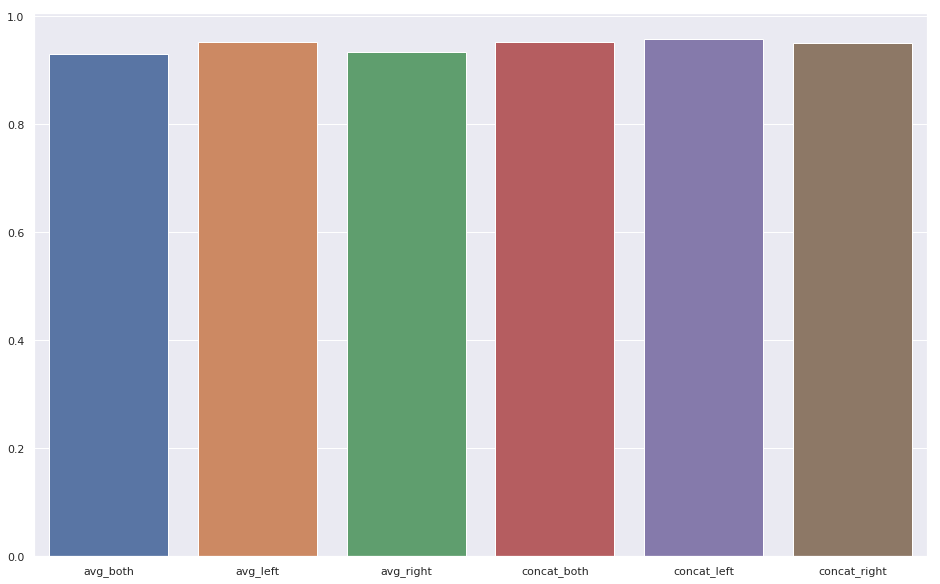

In [13]:
with open("neighbor_test_result.json", "r") as f:
    neighbors_data = json.load(f)
neighbors_data_graph =  sns.barplot(x=list(neighbors_data.keys()), y=list(neighbors_data.values()))

In [14]:
#Elmo goes below here.
elmo_file = "data/elmo_all_lemmas_data.csv"
elmo_df = pd.read_csv(elmo_file)
elmo_df = elmo_df.sort_values(by="best_avg_acc")

In [15]:
elmo_df

,spec,lemma,best_avg_acc,sense1,sense2,pos1,pos2,sense1_freq,sense2_freq,max_samp
301,elmo,include,0.5416,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,VERB,VERB,329,106,2000
246,elmo,quite,0.5442,/dictionary/sense/en_us_NOAD3e_2012/m_en_us128...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us128...,ADV,ADV,101,26,2000
67,elmo,win,0.5449,/dictionary/sense/en_us_NOAD3e_2012/m_en_us130...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us130...,VERB,VERB,87,79,2000
134,elmo,represent,0.5450,/dictionary/sense/en_us_NOAD3e_2012/m_en_us128...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us128...,VERB,VERB,49,41,2000
373,elmo,same,0.5465,/dictionary/sense/en_us_NOAD3e_2012/m_en_us128...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us128...,ADJ,ADJ,424,37,2000
298,elmo,jump,0.5539,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,VERB,VERB,27,27,2000
209,elmo,regular,0.5546,/dictionary/sense/en_us_NOAD3e_2012/m_en_us128...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us128...,ADJ,ADJ,23,22,2000
187,elmo,when,0.5551,/dictionary/sense/en_us_NOAD3e_2012/m_en_us130...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us130...,ADV,CONJ,364,106,2000
326,elmo,big,0.5554,/dictionary/sense/en_us_NOAD3e_2012/m_en_us122...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us122...,ADJ,ADJ,236,21,2000
368,elmo,keep,0.5560,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us126...,VERB,VERB,370,62,2000


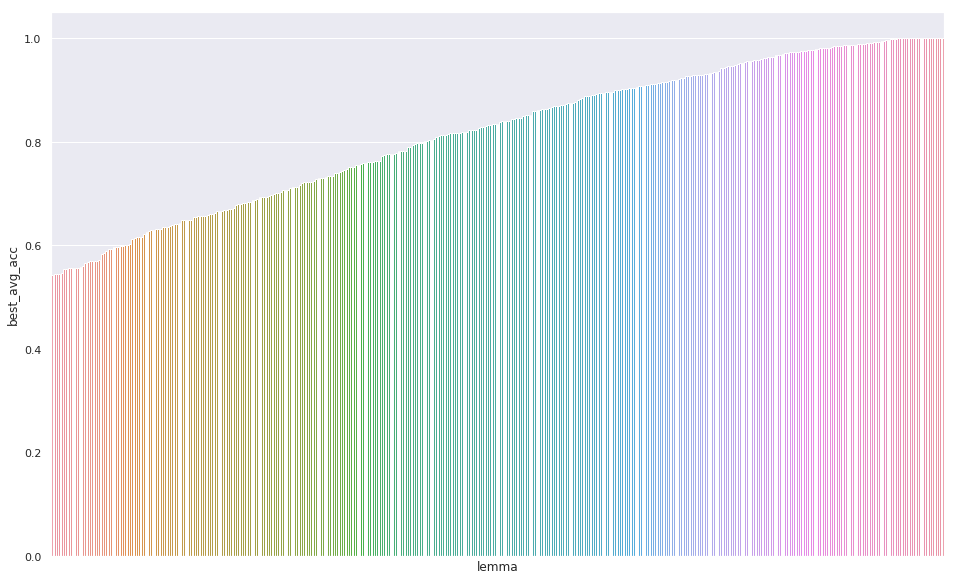

In [16]:
elmo_all_lemmas = elmo_df
plt.xticks(rotation=45)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
elmo_all_lemmas_graph = sns.barplot(x="lemma", y="best_avg_acc", data=elmo_all_lemmas)

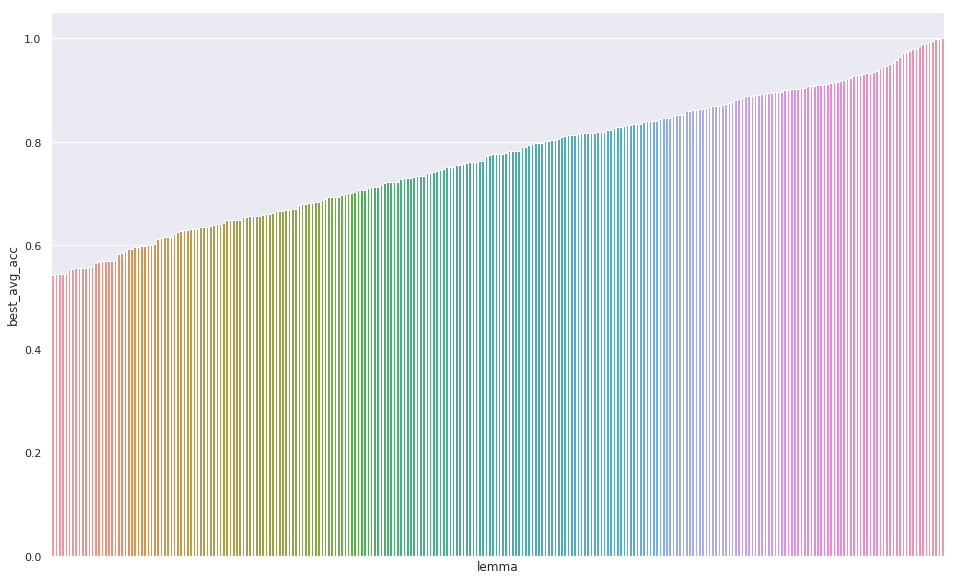

In [17]:
elmo_same_pos = elmo_df[elmo_df["pos1"] == elmo_df["pos2"]]
plt.xticks(rotation=45)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
elmo_same_pos_graph = sns.barplot(x="lemma", y="best_avg_acc", data=elmo_same_pos)

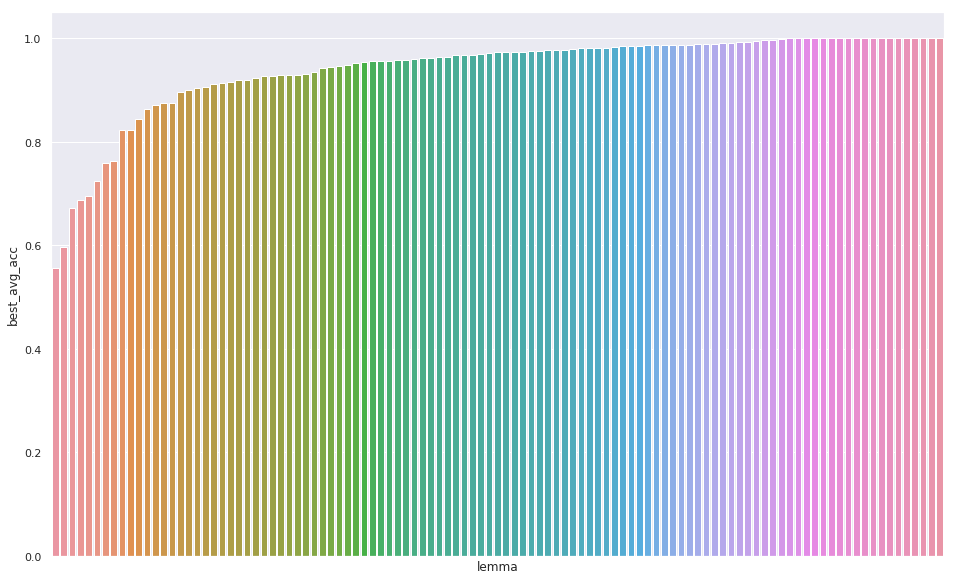

In [18]:
elmo_diff_pos = elmo_df[elmo_df["pos1"] != elmo_df["pos2"]]
plt.xticks(rotation=45)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False)
elmo_diff_pos_graph = sns.barplot(x="lemma", y="best_avg_acc", data=elmo_diff_pos)

In [27]:


with open("data/sense_to_pofs_dict.json") as f:
    sense_pos_dict = json.load(f)
        
        
def get_pair_type(row):
    sense1_pos = sense_pos_dict[row[3]]
    sense2_pos = sense_pos_dict[row[4]]
    if sense1_pos > sense2_pos:
        sense1_pos, sense2_pos = sense2_pos, sense1_pos
    return sense1_pos+", "+sense2_pos

In [28]:
tmp = df.apply(get_pair_type, axis=1).rename("pos_combo")

elmo_df_with_pos_combo = pd.concat([elmo_df, tmp], axis=1)
elmo_df_with_pos_combo

,spec,lemma,best_avg_acc,sense1,sense2,pos1,pos2,sense1_freq,sense2_freq,max_samp,pos_combo
0,elmo,tax,1.0000,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,NOUN,VERB,167.0,21.0,2000.0,"NOUN, NOUN"
1,elmo,get,0.6013,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,VERB,VERB,351.0,238.0,2000.0,"NOUN, VERB"
2,elmo,right,0.9524,/dictionary/sense/en_us_NOAD3e_2012/m_en_us128...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us128...,ADJ,NOUN,199.0,179.0,2000.0,"NOUN, NOUN"
3,elmo,recognize,0.8041,/dictionary/sense/en_us_NOAD3e_2012/m_en_us128...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us128...,VERB,VERB,80.0,54.0,2000.0,"NOUN, NOUN"
4,elmo,ground,0.7972,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us125...,NOUN,NOUN,111.0,25.0,2000.0,"ADJ, ADJ"
5,elmo,significant,0.6485,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,ADJ,ADJ,41.0,21.0,2000.0,"ADJ, ADV"
6,elmo,sex,0.7617,/dictionary/sense/en_us_NOAD3e_2012/m_en_us128...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us128...,NOUN,NOUN,27.0,24.0,2000.0,"NOUN, NOUN"
7,elmo,think,0.7611,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,VERB,VERB,881.0,324.0,2000.0,"ADJ, NOUN"
8,elmo,need,0.9862,/dictionary/sense/en_us_NOAD3e_2012/m_en_us127...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us127...,VERB,NOUN,395.0,72.0,2000.0,"NOUN, NOUN"
9,elmo,still,0.6304,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,/dictionary/sense/en_us_NOAD3e_2012/m_en_us129...,ADV,ADV,348.0,71.0,2000.0,"ADJ, ADJ"


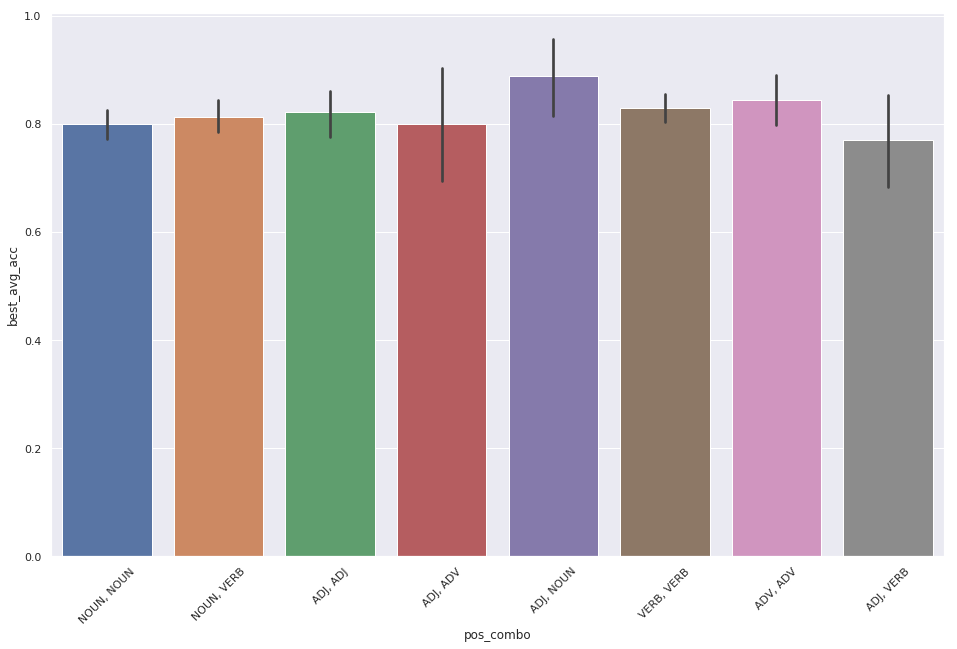

In [29]:
#Note: many of the pos_combos have very few datapoints, in fact several have just one
plt.xticks(rotation=45)
elmo_df_with_pos_combo = elmo_df_with_pos_combo[elmo_df_with_pos_combo["pos_combo"].isin(["VERB, VERB",
"ADV, ADV","ADJ, ADJ","NOUN, NOUN", "ADJ, ADV", "NOUN, VERB", "ADJ, NOUN", "ADJ, VERB"])]

elmo_diff_pos_graph = sns.barplot(x="pos_combo", y="best_avg_acc", data=elmo_df_with_pos_combo)

[None]

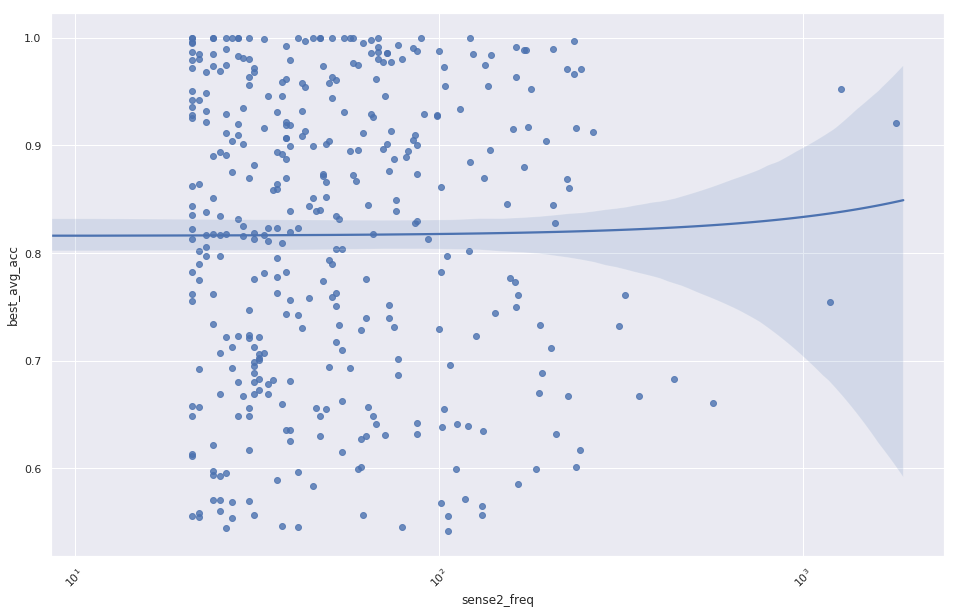

In [35]:
elmo_max_samp_data = elmo_df
plt.xticks(rotation=45)
elmo_max_samp_graph = sns.regplot(x="sense2_freq", y="best_avg_acc", data=elmo_max_samp_data)
elmo_max_samp_graph.set(xscale="log")